In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path) 

merge_df =pd.merge(mouse_df, study_df, on="Mouse ID", how ="inner", suffixes = ("_mouse", "_data"))
merge_df

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
merge1_df =(pd.merge(mouse_df, study_df, on="Mouse ID", how ="outer", suffixes = ("_mouse", "_data")))
merge1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
merge = merge_df
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [53]:
merge_df.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          25         40.146450           0                   1
                                                        30         40.668343           1                   1
                        

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge = merge[["Mouse ID", "Timepoint"]].drop_duplicates
merge()




,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [55]:
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [56]:
clean_study_data_complete = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
unique_number = len(clean_study_data_complete["Mouse ID"].unique())

unique_number

248

In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [59]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

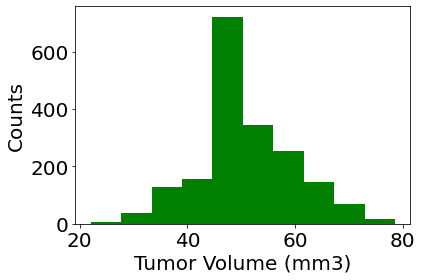

Mean of the study results is: 50.44
Median of the study results is: 48.93
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=11.937831444199361, pvalue=0.0025570124285164055)


In [60]:
plt.hist(clean_study_data_complete['Tumor Volume (mm3)'],color='green',bins=10)
        
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(clean_study_data_complete['Tumor Volume (mm3)'].sample(100),))
                                                                          
                   

In [61]:

s_stats = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen").count())

s_stats["Mean"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
s_stats["Median"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
s_stats["Standard Deviation"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
s_stats["Variance"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
s_stats["SEM"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
s_stats = s_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
s_stats = s_stats.rename(columns = {"Mouse ID" : "Trials"})

s_stats.head()



,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

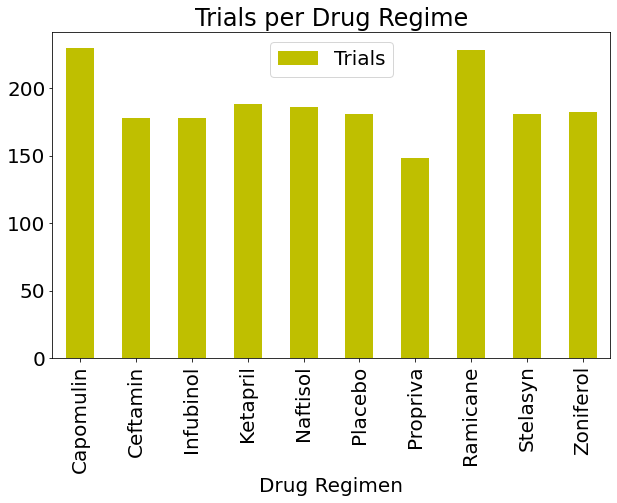

<Figure size 432x288 with 0 Axes>

In [63]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints = s_stats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(10,6), color = "y", legend=True)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

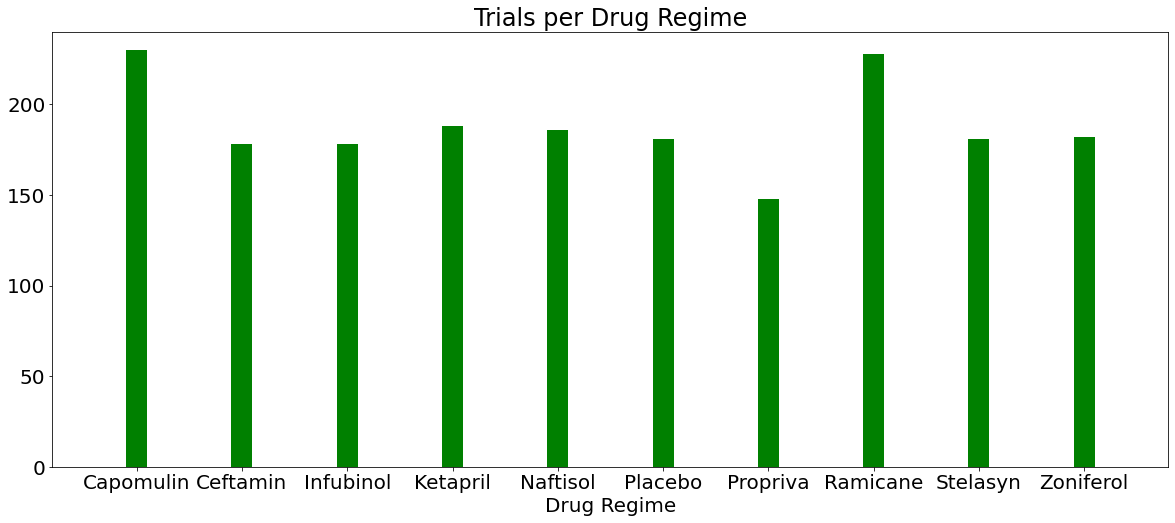

In [64]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,8))
plt.bar(x_axis, datapoints["Trials"], color = "g", width = .20)
plt.xticks(tick_locations, datapoints.index.values, rotation="horizontal")

# Set x and y limits
plt.xlim(-0.80, len(x_axis)-.20)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()


In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group =clean_study_data_complete.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()


,Sex
Sex,
Female,922
Male,958


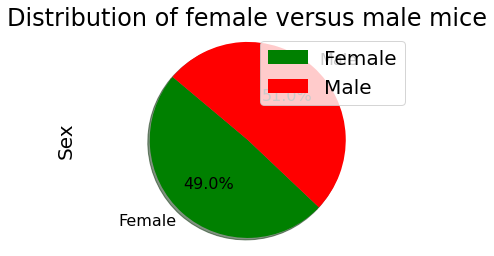

In [66]:
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["g","r"],legend =True)

plt.axis("equal")
plt.show()

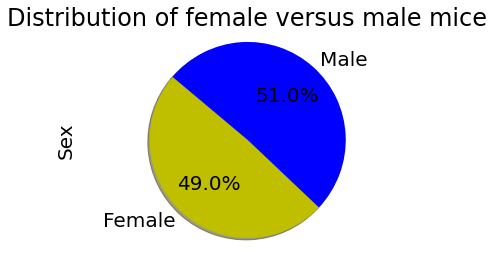

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["y", "b"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 20
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

filtered_df = clean_study_data_complete.loc[(clean_study_data_complete["Drug Regime")] == "Capomulin") | (clean_study_data_complete["Drug Regimen"] == "Ramicane") | (clean_study_data_complete["Drug Regimen"] == "Ceftamin") | (clean_study_data_complete["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

# Not finding any outliers. 

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-68-c83bdd4ae763>, line 9)

In [69]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

NameError: name 'filtered_df' is not defined

## Line and Scatter Plots

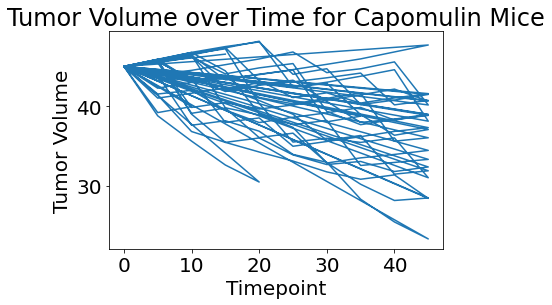

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_study_data_complete.loc[(clean_study_data_complete["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()


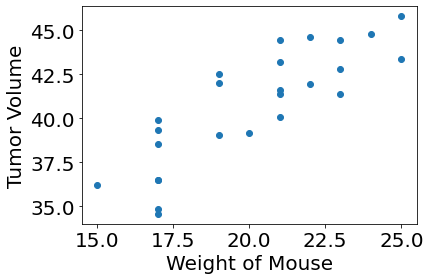

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
